<h1><center><font color='midnightblue'> Assignment Of Hypothesis Testing Part 1:</font></center></h1>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
course_actions = pd.read_csv("course_page_actions.csv")
course_actions.head()

,timestamp,id,group,action,duration
0,2016-09-24 17:14:52.012145,261869,experiment,view,130.545004
1,2016-09-24 18:45:09.645857,226546,experiment,view,159.862440
2,2016-09-24 19:16:21.002533,286353,experiment,view,79.349315
3,2016-09-24 19:43:06.927785,842279,experiment,view,55.536126
4,2016-09-24 21:08:22.790333,781883,experiment,view,204.322437


<h2><center><p><font color='blue'>Test that average enrollment rate for the group <font color='crimson'>experiment</font> is bigger than the average enrollment rate in group <font color='crimson'>control</font>:<br><em><font color='crimson'>Alternative:</font> 
Avg(Experiment.action)-Avg(control.action)&lt;0</em><br><em><font color='crimson'>Null</font> 
Avg(Experiment.action)-Avg(control.action)&gt;=0</em></font></p></center></h2>

<h2><center><font color='blue'>Getting the average enrollment rate of the group <font color='crimson'>experiment</font>:</font></center></h2>

In [3]:
experiment = course_actions.query("group == 'experiment'")

In [4]:
experiment_average = experiment.query("action == 'enroll'").id.nunique() / experiment.query("action == 'view'").id.nunique()
print(f'The average enrollment rate of the group experiment is: {experiment_average}')

The average enrollment rate of the group experiment is: 0.007696007696007696


<h2><center><font color='blue'>Getting the average enrollment rate of the group <font color='crimson'>control</font>:</font></center></h2>

In [5]:
control = course_actions.query("group == 'control'")

In [6]:
control_average = control.query("action == 'enroll'").id.nunique() / control.query("action == 'view'").id.nunique()
print(f'The average enrollment rate of the group control is: {control_average}')

The average enrollment rate of the group control is: 0.012827090815802977


<h2><center><font color='blue'>Computing the observed difference in <font color='crimson'>course actions</font>:</font></center></h2>

In [7]:
obs_diff = experiment_average - control_average
print(f'The observed difference in course actions is: {obs_diff}')

The observed difference in course actions is: -0.00513108311979528


<h2><center><font color='blue'>Creating <font color='crimson'>sampling distribution</font> of difference in average course actions:</font></center></h2>

In [8]:
diff = []
size = course_actions.shape[0]
for _ in range (10000) :
    a_sample = course_actions.sample(size , replace = True)
    exp = a_sample.query('group == "experiment"')
    ctrl = a_sample.query('group == "control"')
    avg_exp = exp.query('action == "enroll"').id.nunique() / exp.query('action == "view"').id.nunique()
    avg_ctrl = ctrl.query('action == "enroll"').id.nunique() / ctrl.query('action == "view"').id.nunique()
    diff.append(avg_exp - avg_ctrl)

<h2><center><font color='blue'>Plotting the <font color='crimson'>sampling distribution</font>:</font></center></h2>

(array([  18.,  147.,  674., 1776., 2691., 2658., 1436.,  481.,  107.,
          12.]),
 array([-0.01397453, -0.01216397, -0.0103534 , -0.00854284, -0.00673227,
        -0.00492171, -0.00311114, -0.00130058,  0.00050999,  0.00232055,
         0.00413112]),
 <a list of 10 Patch objects>)

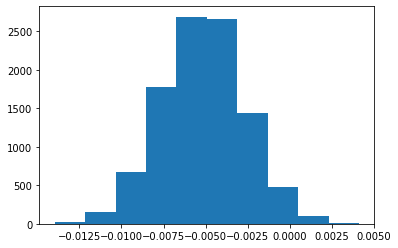

In [9]:
plt.hist(diff)

<h2><center><font color='blue'>Simulating the distribution under the <font color='crimson'>null hypothesis</font>:</font></center></h2>

In [10]:
null = np.random.normal(0 , np.std(diff) , len(diff))

<h2><center><font color='blue'>Plotting the <font color='crimson'>null hypothesis</font><br>Plotting a line for <font color='crimson'>observed statistic</font>:</font></center></h2>

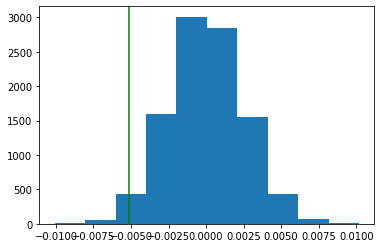

In [11]:
plt.hist(null)

plt.axvline(x = obs_diff , c = 'green')

<h2><center><font color='blue'> Computing the <font color='crimson'>p-value</font>:</font></center></h2>

In [12]:
p_value = (null > obs_diff).mean()
print(f'The p-value is: {p_value}')

The p-value is: 0.9819


<h3><font color='limegreen'>We will reject the alternative hypothesis.</font></h3>